In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 15:53:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   164W / 260W |   5339MiB / 11019MiB |     94%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_de = db.patent_de
    # db_us = db.patent_us
    # db_cn = db.patent_cn

    db_rm_cn_2018 = db.rm_patent_cn_2018
    db_rm_us_2018 = db.rm_patent_us_2018
    db_rm_de_2018 = db.rm_patent_de_2018

    
except errors.ConnectionFailure as err:
    print(err)

# 2018

## Company數量

In [6]:
data_assignee = db_rm_de_2018.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])

In [7]:
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [8]:
data_assignee = db_rm_cn_2018.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [9]:
data_assignee = db_rm_us_2018.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_us = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [10]:
# final_df = pd.concat([df_family_de,df_family_cn,df_family_us],axis=0)

### DE

In [11]:
# 取總數前15家公司
df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
16,Intel Corp,31
17,Intel IP Corp,21
1,Apple Inc,16
11,Giesecke and Devrient Mobile Security GmbH,11
21,Samsung Electronics Co Ltd,11
9,Fraunhofer Gesellschaft zur Forderung der Ange...,10
23,Siemens AG,6
10,Friedrich Alexander Univeritaet Erlangen Nuern...,5
26,Sony Semiconductor Solutions Corp,5
14,Infineon Technologies AG,5


In [12]:
com_de_df = df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_de_df.reset_index(drop=True, inplace=True)

In [13]:
com_de_df["count_log"] = com_de_df["count"].apply(lambda x: np.log(x))
com_de_df

,company,count,count_log
0,Intel Corp,31,3.433987
1,Intel IP Corp,21,3.044522
2,Apple Inc,16,2.772589
3,Giesecke and Devrient Mobile Security GmbH,11,2.397895
4,Samsung Electronics Co Ltd,11,2.397895
5,Fraunhofer Gesellschaft zur Forderung der Ange...,10,2.302585
6,Siemens AG,6,1.791759
7,Friedrich Alexander Univeritaet Erlangen Nuern...,5,1.609438
8,Sony Semiconductor Solutions Corp,5,1.609438
9,Infineon Technologies AG,5,1.609438


In [14]:
com_de_ls = list(com_de_df.company)

### CN

In [15]:
# 取總數前15家公司
df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
20,Qualcomm Inc,321
10,Huawei Technologies Co Ltd,265
21,Samsung Electronics Co Ltd,234
28,Xian Irain IoT Technology Service Co Ltd,177
16,NTT Docomo Inc,129
22,Shanghai Langbo Communication Technology Co Ltd,112
2,China Mobile Communications Group Co Ltd,99
17,NTT Korea Co Ltd,73
26,Telefonaktiebolaget LM Ericsson AB,72
8,Guangdong Oppo Mobile Telecommunications Corp Ltd,63


In [16]:
com_cn_df = df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_cn_df.reset_index(drop=True, inplace=True)

In [17]:
com_cn_df["count_log"] = com_cn_df["count"].apply(lambda x: np.log(x))
com_cn_df

,company,count,count_log
0,Qualcomm Inc,321,5.771441
1,Huawei Technologies Co Ltd,265,5.579730
2,Samsung Electronics Co Ltd,234,5.455321
3,Xian Irain IoT Technology Service Co Ltd,177,5.176150
4,NTT Docomo Inc,129,4.859812
5,Shanghai Langbo Communication Technology Co Ltd,112,4.718499
6,China Mobile Communications Group Co Ltd,99,4.595120
7,NTT Korea Co Ltd,73,4.290459
8,Telefonaktiebolaget LM Ericsson AB,72,4.276666
9,Guangdong Oppo Mobile Telecommunications Corp Ltd,63,4.143135


In [18]:
com_cn_ls = list(com_cn_df.company)

### US

In [19]:
# 取總數前15家公司
df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
20,Qualcomm Inc,832
24,Samsung Electronics Co Ltd,611
28,Telefonaktiebolaget LM Ericsson AB,437
10,Intel Corp,391
11,International Business Machines Corp,346
4,Cisco Technology Inc,196
16,Microsoft Technology Licensing LLC,164
2,Apple Inc,142
19,Nokia Technologies Oy,134
13,LG Electronics Inc,121


In [20]:
com_us_df = df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_us_df.reset_index(drop=True, inplace=True)

In [21]:
com_us_df["count_log"] = com_us_df["count"].apply(lambda x: np.log(x))
com_us_df

,company,count,count_log
0,Qualcomm Inc,832,6.723832
1,Samsung Electronics Co Ltd,611,6.415097
2,Telefonaktiebolaget LM Ericsson AB,437,6.079933
3,Intel Corp,391,5.968708
4,International Business Machines Corp,346,5.846439
5,Cisco Technology Inc,196,5.278115
6,Microsoft Technology Licensing LLC,164,5.099866
7,Apple Inc,142,4.955827
8,Nokia Technologies Oy,134,4.897840
9,LG Electronics Inc,121,4.795791


In [22]:
com_us_ls = list(com_us_df.company)

# Data

## CN

In [23]:
ccontry = pd.read_csv("../rm_company_country_cn_2018.csv")
ccpc = pd.read_csv("../rm_company_cpc_cn_2018.csv")

In [24]:
ccontry[ccontry.company.isin(com_cn_ls)]

,company,AR,AT,AU,BE,BR,CA,CL,CN,CO,...,PH,PL,PT,RO,RU,SE,SG,TW,US,ZA
77,Apple Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0
379,China Mobile Communications Group Co Ltd,0.0,0.0,2.0,0.0,2.0,2.0,0.0,233.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
415,China University of Geosciences,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,Guangdong Oppo Mobile Telecommunications Corp Ltd,0.0,0.0,36.0,0.0,12.0,14.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,14.0,22.0,49.0,0.0
982,Huawei Technologies Co Ltd,0.0,0.0,13.0,0.0,22.0,9.0,0.0,267.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,118.0,0.0
1070,Intel Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,0.0
1239,LG Electronics Inc,0.0,0.0,2.0,0.0,4.0,2.0,3.0,42.0,0.0,...,3.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,41.0,1.0
1338,NTT Docomo Inc,0.0,0.0,13.0,0.0,41.0,23.0,0.0,202.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,121.0,0.0
1339,NTT Korea Co Ltd,0.0,0.0,8.0,0.0,30.0,16.0,0.0,146.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,104.0,0.0
1568,Qualcomm Inc,1.0,0.0,13.0,0.0,112.0,49.0,4.0,319.0,4.0,...,4.0,0.0,0.0,0.0,2.0,0.0,65.0,163.0,307.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [25]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [26]:
ccontry_pbc = ccontry2.loc[com_cn_ls,:].copy()
ccontry_pbc.head()

,AR,AT,AU,BE,BR,CA,CL,CN,CO,DE,...,PH,PL,PT,RO,RU,SE,SG,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.000636,0.0,0.008270,0.0,0.071247,0.031170,0.002545,0.202926,0.002545,0.000636,...,0.002545,0.000000,0.000000,0.0,0.001272,0.0,0.041349,0.103690,0.195293,0.0
Huawei Technologies Co Ltd,0.000000,0.0,0.022109,0.0,0.037415,0.015306,0.000000,0.454082,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.003401,0.0,0.001701,0.000000,0.200680,0.0
Samsung Electronics Co Ltd,0.000000,0.0,0.025694,0.0,0.001028,0.009250,0.000000,0.289825,0.000000,0.002055,...,0.003083,0.001028,0.001028,0.0,0.000000,0.0,0.004111,0.003083,0.197328,0.0
Xian Irain IoT Technology Service Co Ltd,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
NTT Docomo Inc,0.000000,0.0,0.016839,0.0,0.053109,0.029793,0.000000,0.261658,0.000000,0.000000,...,0.006477,0.000000,0.000000,0.0,0.000000,0.0,0.007772,0.000000,0.156736,0.0


In [27]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [28]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [29]:
ccpc_pbc = ccpc2.loc[com_cn_ls,:].copy()
# ccpc_pbc

In [30]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [31]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

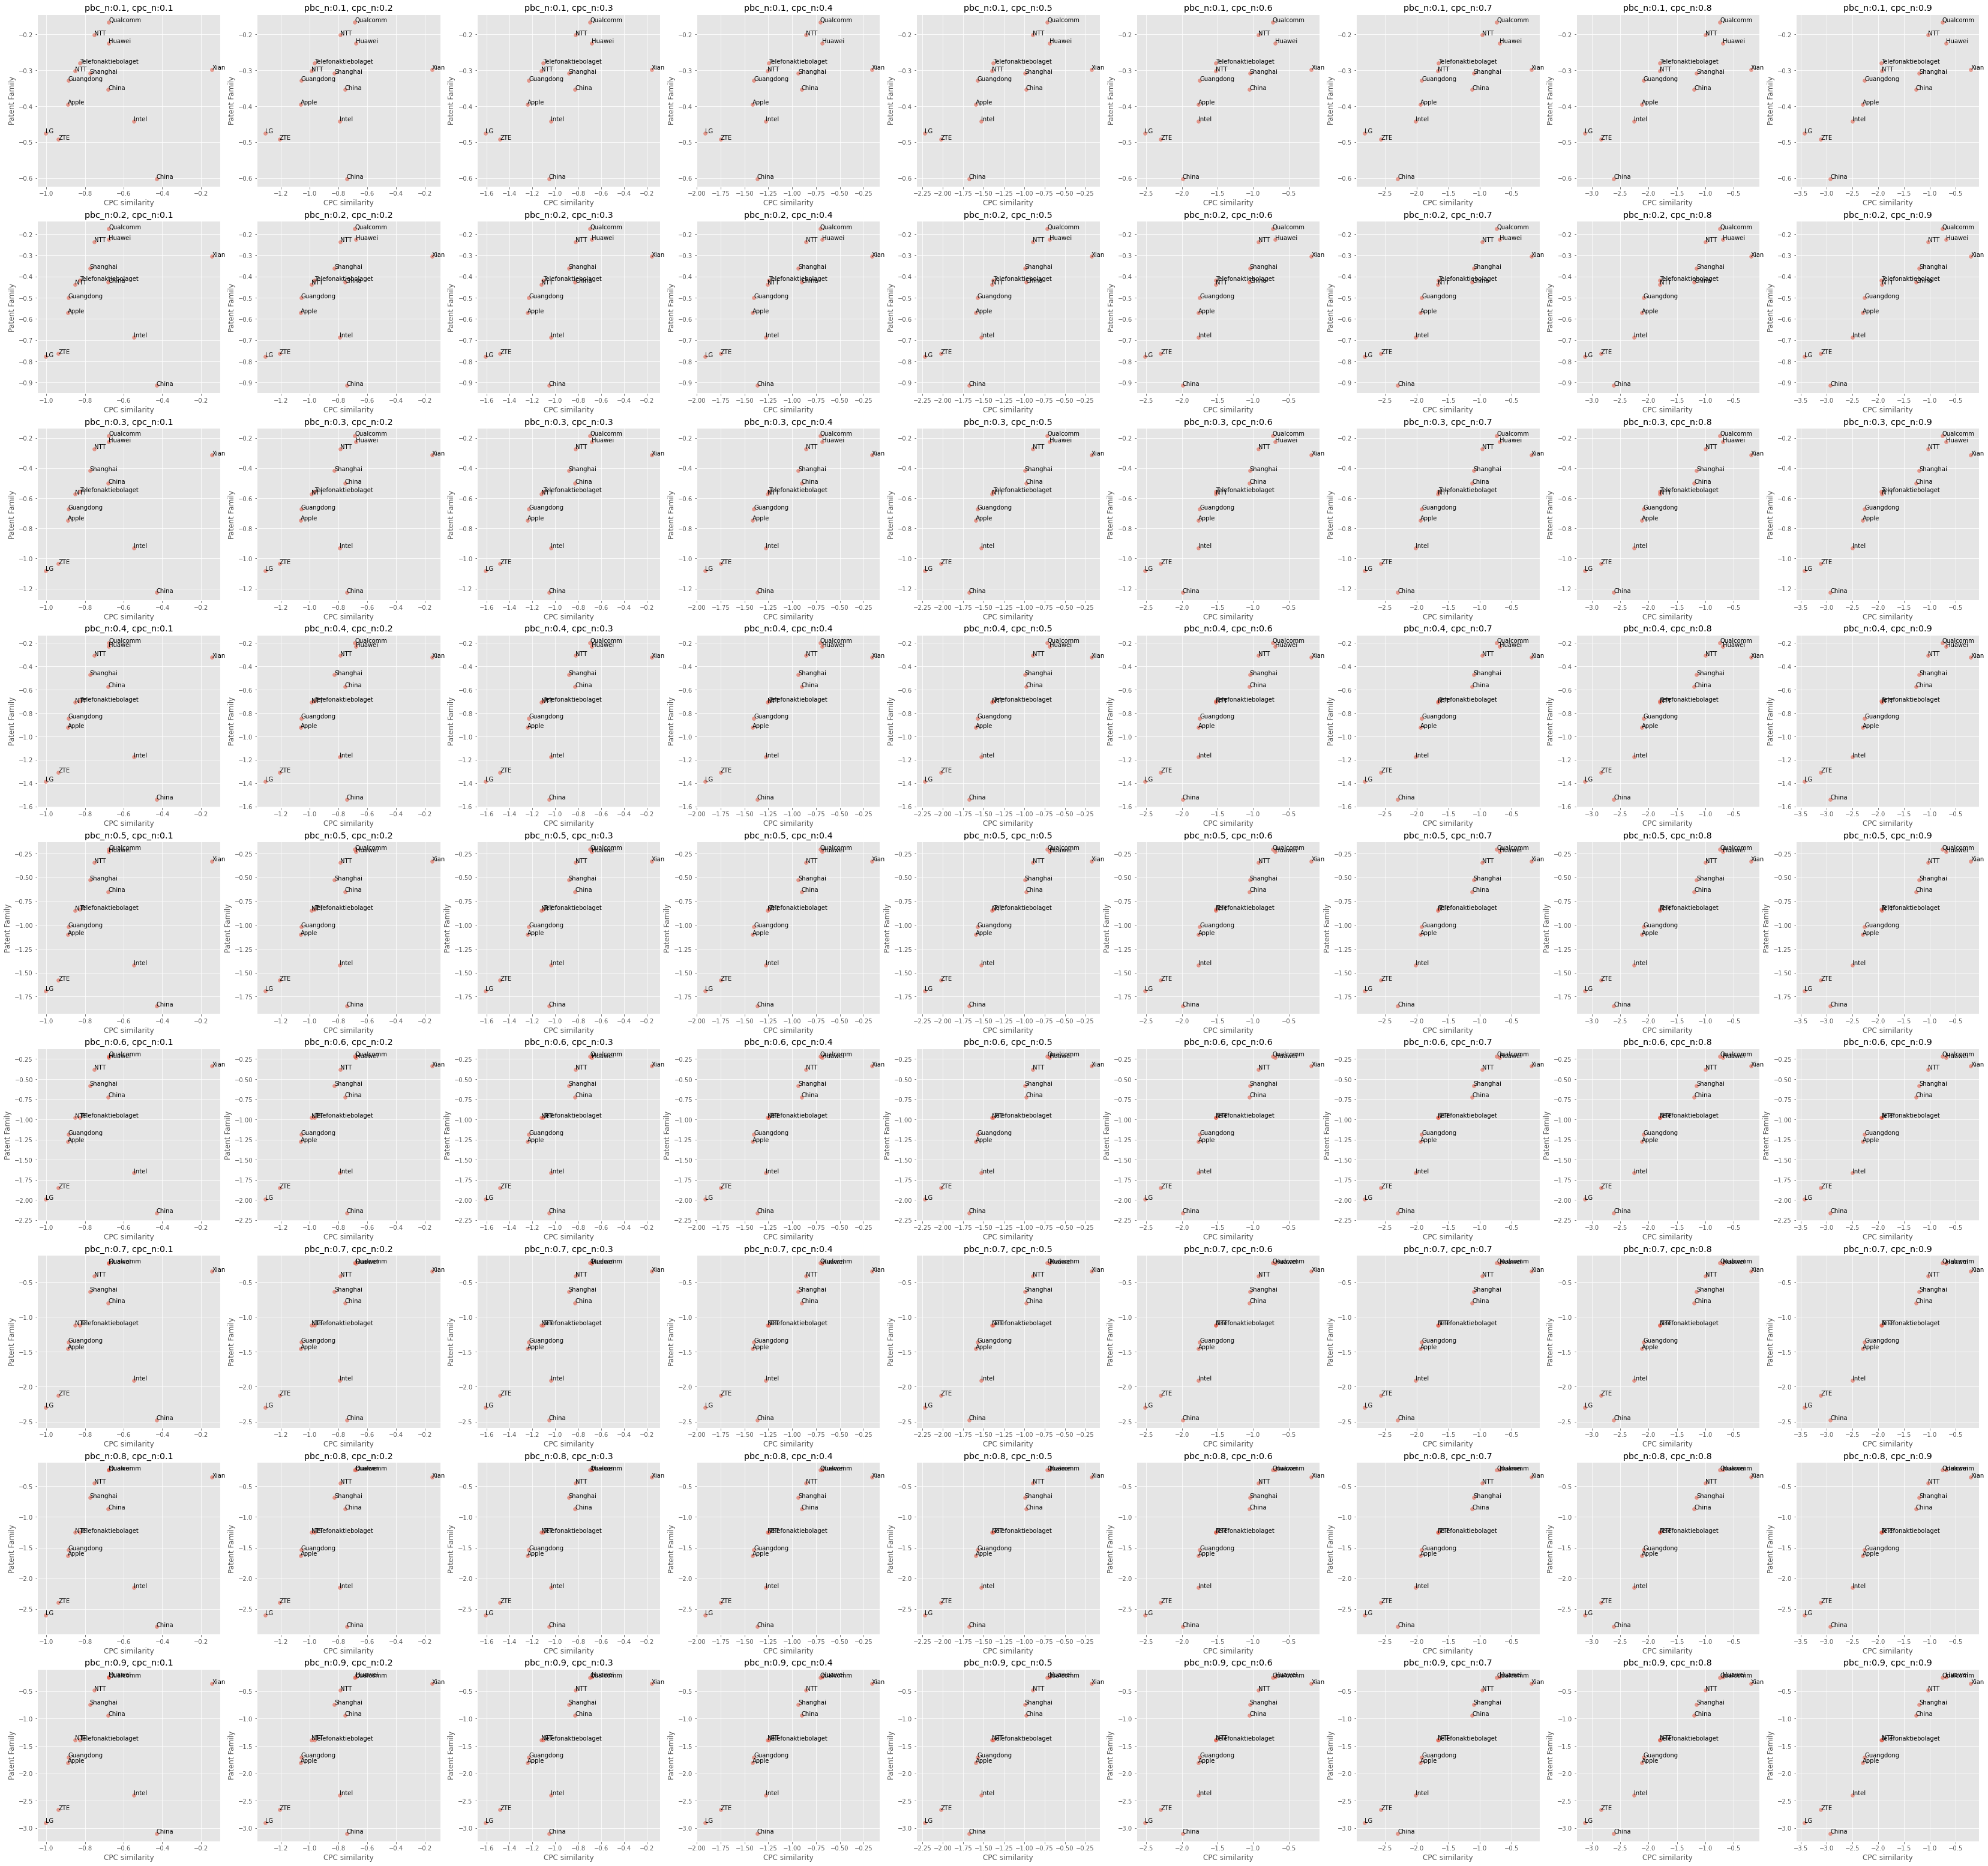

In [32]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2018_1.png'.format(pbc_n))

In [33]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.756749,0.245481
Huawei Technologies Co Ltd,0.691273,0.236310
Xian Irain IoT Technology Service Co Ltd,0.204909,0.359968
NTT Docomo Inc,1.035523,0.484814
Shanghai Langbo Communication Technology Co Ltd,1.209407,0.742578
China Mobile Communications Group Co Ltd,1.272878,0.945189
NTT Korea Co Ltd,1.935662,1.387292
Telefonaktiebolaget LM Ericsson AB,1.938362,1.391481
Guangdong Oppo Mobile Telecommunications Corp Ltd,2.264489,1.706108


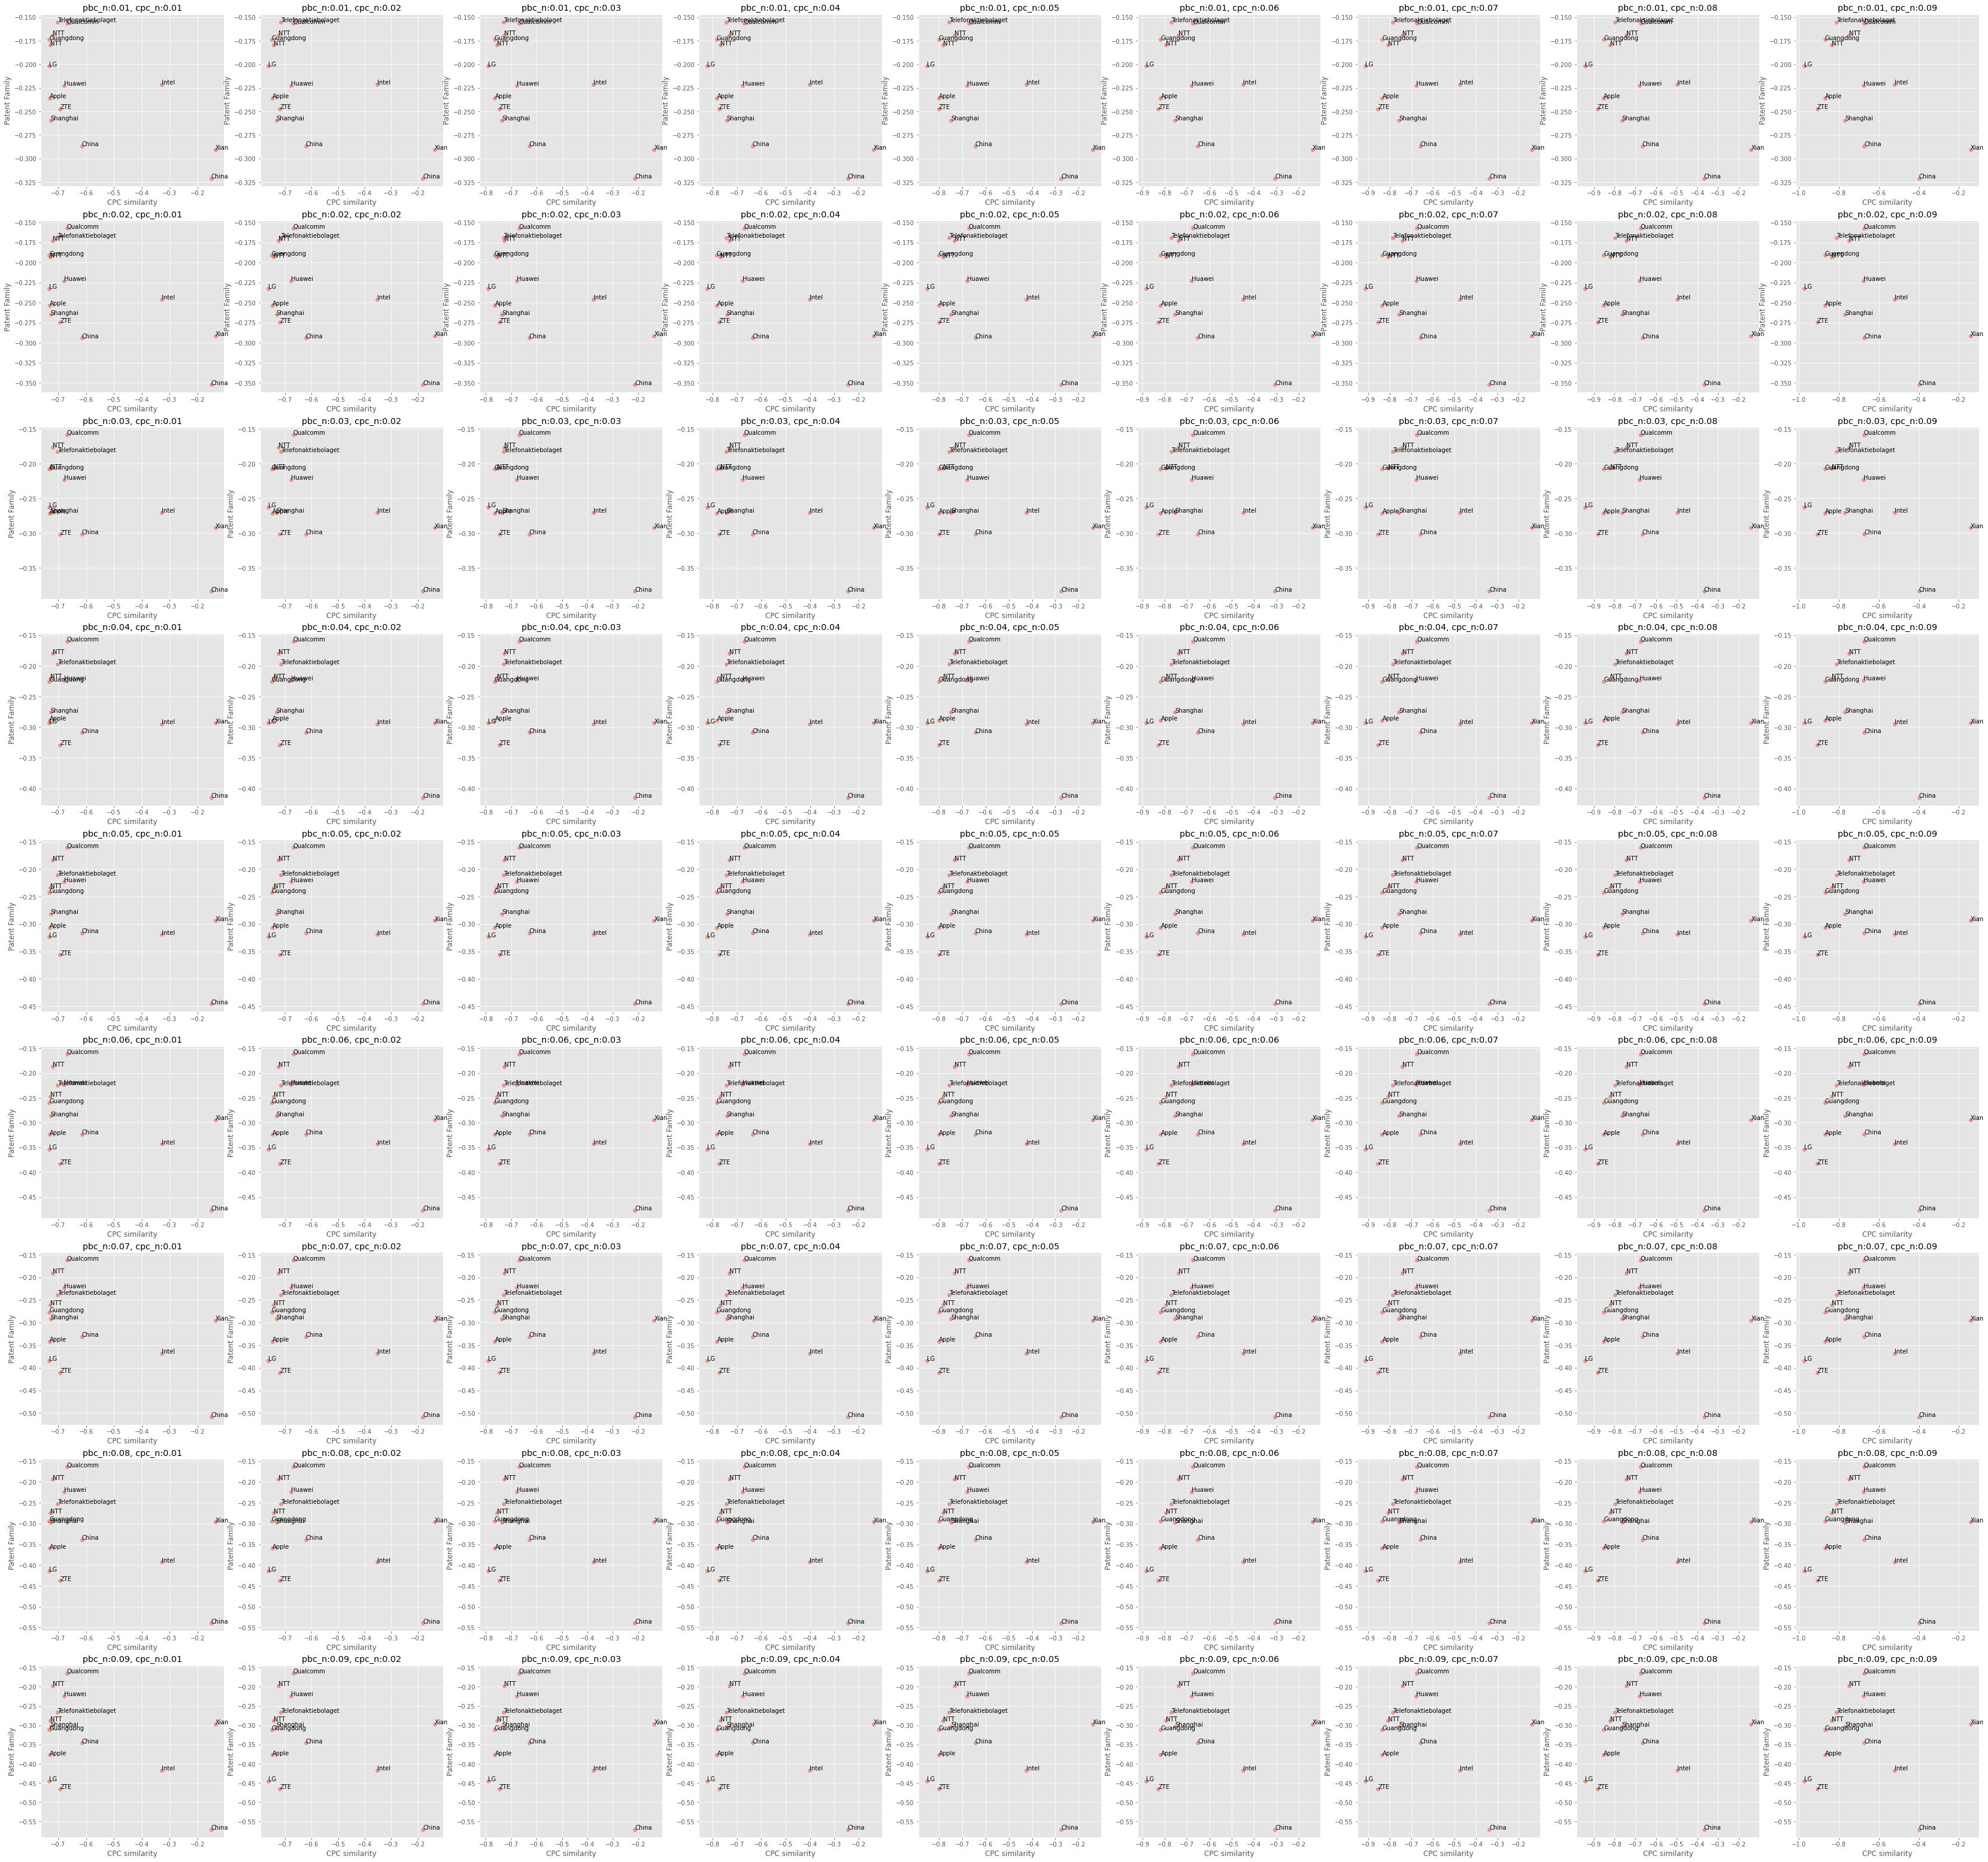

In [34]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2018_2.png'.format(pbc_n))

In [35]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.675804,0.164536
Huawei Technologies Co Ltd,0.678736,0.223773
Xian Irain IoT Technology Service Co Ltd,0.141780,0.296840
NTT Docomo Inc,0.748272,0.197563
Shanghai Langbo Communication Technology Co Ltd,0.769652,0.302823
China Mobile Communications Group Co Ltd,0.673521,0.345833
NTT Korea Co Ltd,0.836570,0.288201
Telefonaktiebolaget LM Ericsson AB,0.813088,0.266207
Guangdong Oppo Mobile Telecommunications Corp Ltd,0.869805,0.311423


### Scatter Plot2

In [36]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

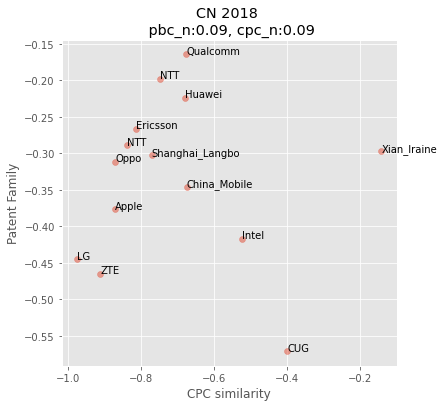

In [37]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("CN 2018 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [38]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [39]:
competitor_ls

[2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 3, 4, 4, 3]

In [40]:
c_df

,cpc,country
company,,
Qualcomm,0.675804,0.164536
Huawei Technologies,0.678736,0.223773
Xian_Iraine,0.141780,0.296840
NTT Docomo,0.748272,0.197563
Shanghai_Langbo,0.769652,0.302823
China_Mobile,0.673521,0.345833
NTT Korea,0.836570,0.288201
Ericsson,0.813088,0.266207
Oppo,0.869805,0.311423


In [41]:
c_df.to_csv("competitor_df/company/cpc_cn_2018.csv")

## US

In [42]:
ccontry = pd.read_csv("../rm_company_country_us_2018.csv")
ccpc = pd.read_csv("../rm_company_cpc_us_2018.csv")

In [43]:
ccontry[ccontry.company.isin(com_us_ls)]

,company,AP,AR,AT,AU,BE,BR,CA,CL,CN,...,PT,RO,RU,SE,SG,TN,TR,TW,US,ZA
26,AT&T Intellectual Property I LP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0
77,Amazon Technologies Inc,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0
95,Apple Inc,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,128.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,235.0,0.0
247,Cisco Technology Inc,0.0,0.0,0.0,2.0,0.0,0.0,7.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,0.0
601,Intel Corp,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,164.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,482.0,0.0
611,International Business Machines Corp,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0
700,LG Electronics Inc,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,45.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,123.0,0.0
799,Microsoft Technology Licensing LLC,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,55.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,164.0,0.0
831,NEC Corp,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0
896,Nokia Technologies Oy,0.0,0.0,0.0,4.0,0.0,9.0,5.0,2.0,112.0,...,0.0,0.0,3.0,0.0,3.0,0.0,0.0,5.0,155.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [44]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [45]:
ccontry_pbc = ccontry2.loc[com_us_ls,:].copy()
ccontry_pbc.head()

,AP,AR,AT,AU,BE,BR,CA,CL,CN,CO,...,PT,RO,RU,SE,SG,TN,TR,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.000000,0.000883,0.0,0.011484,0.0,0.066843,0.025618,0.003239,0.189635,0.003239,...,0.000000,0.0,0.002061,0.0,0.039164,0.000294,0.000000,0.088634,0.244700,0.000000
Samsung Electronics Co Ltd,0.000000,0.000000,0.0,0.002818,0.0,0.000000,0.000000,0.000000,0.155581,0.000000,...,0.000000,0.0,0.001127,0.0,0.001691,0.000000,0.000000,0.012401,0.357384,0.000000
Telefonaktiebolaget LM Ericsson AB,0.000734,0.015407,0.0,0.008804,0.0,0.032282,0.008070,0.000734,0.138665,0.005136,...,0.004402,0.0,0.025679,0.0,0.001467,0.000000,0.000734,0.008804,0.319883,0.009538
Intel Corp,0.000000,0.000000,0.0,0.001099,0.0,0.003297,0.000000,0.000000,0.180220,0.000000,...,0.000000,0.0,0.000000,0.0,0.002198,0.000000,0.000000,0.003297,0.529670,0.000000
International Business Machines Corp,0.000000,0.000000,0.0,0.000000,0.0,0.002525,0.000000,0.000000,0.050505,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.883838,0.000000


In [46]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [47]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [48]:
ccpc_pbc = ccpc2.loc[com_us_ls,:].copy()
# ccpc_pbc

In [49]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [50]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

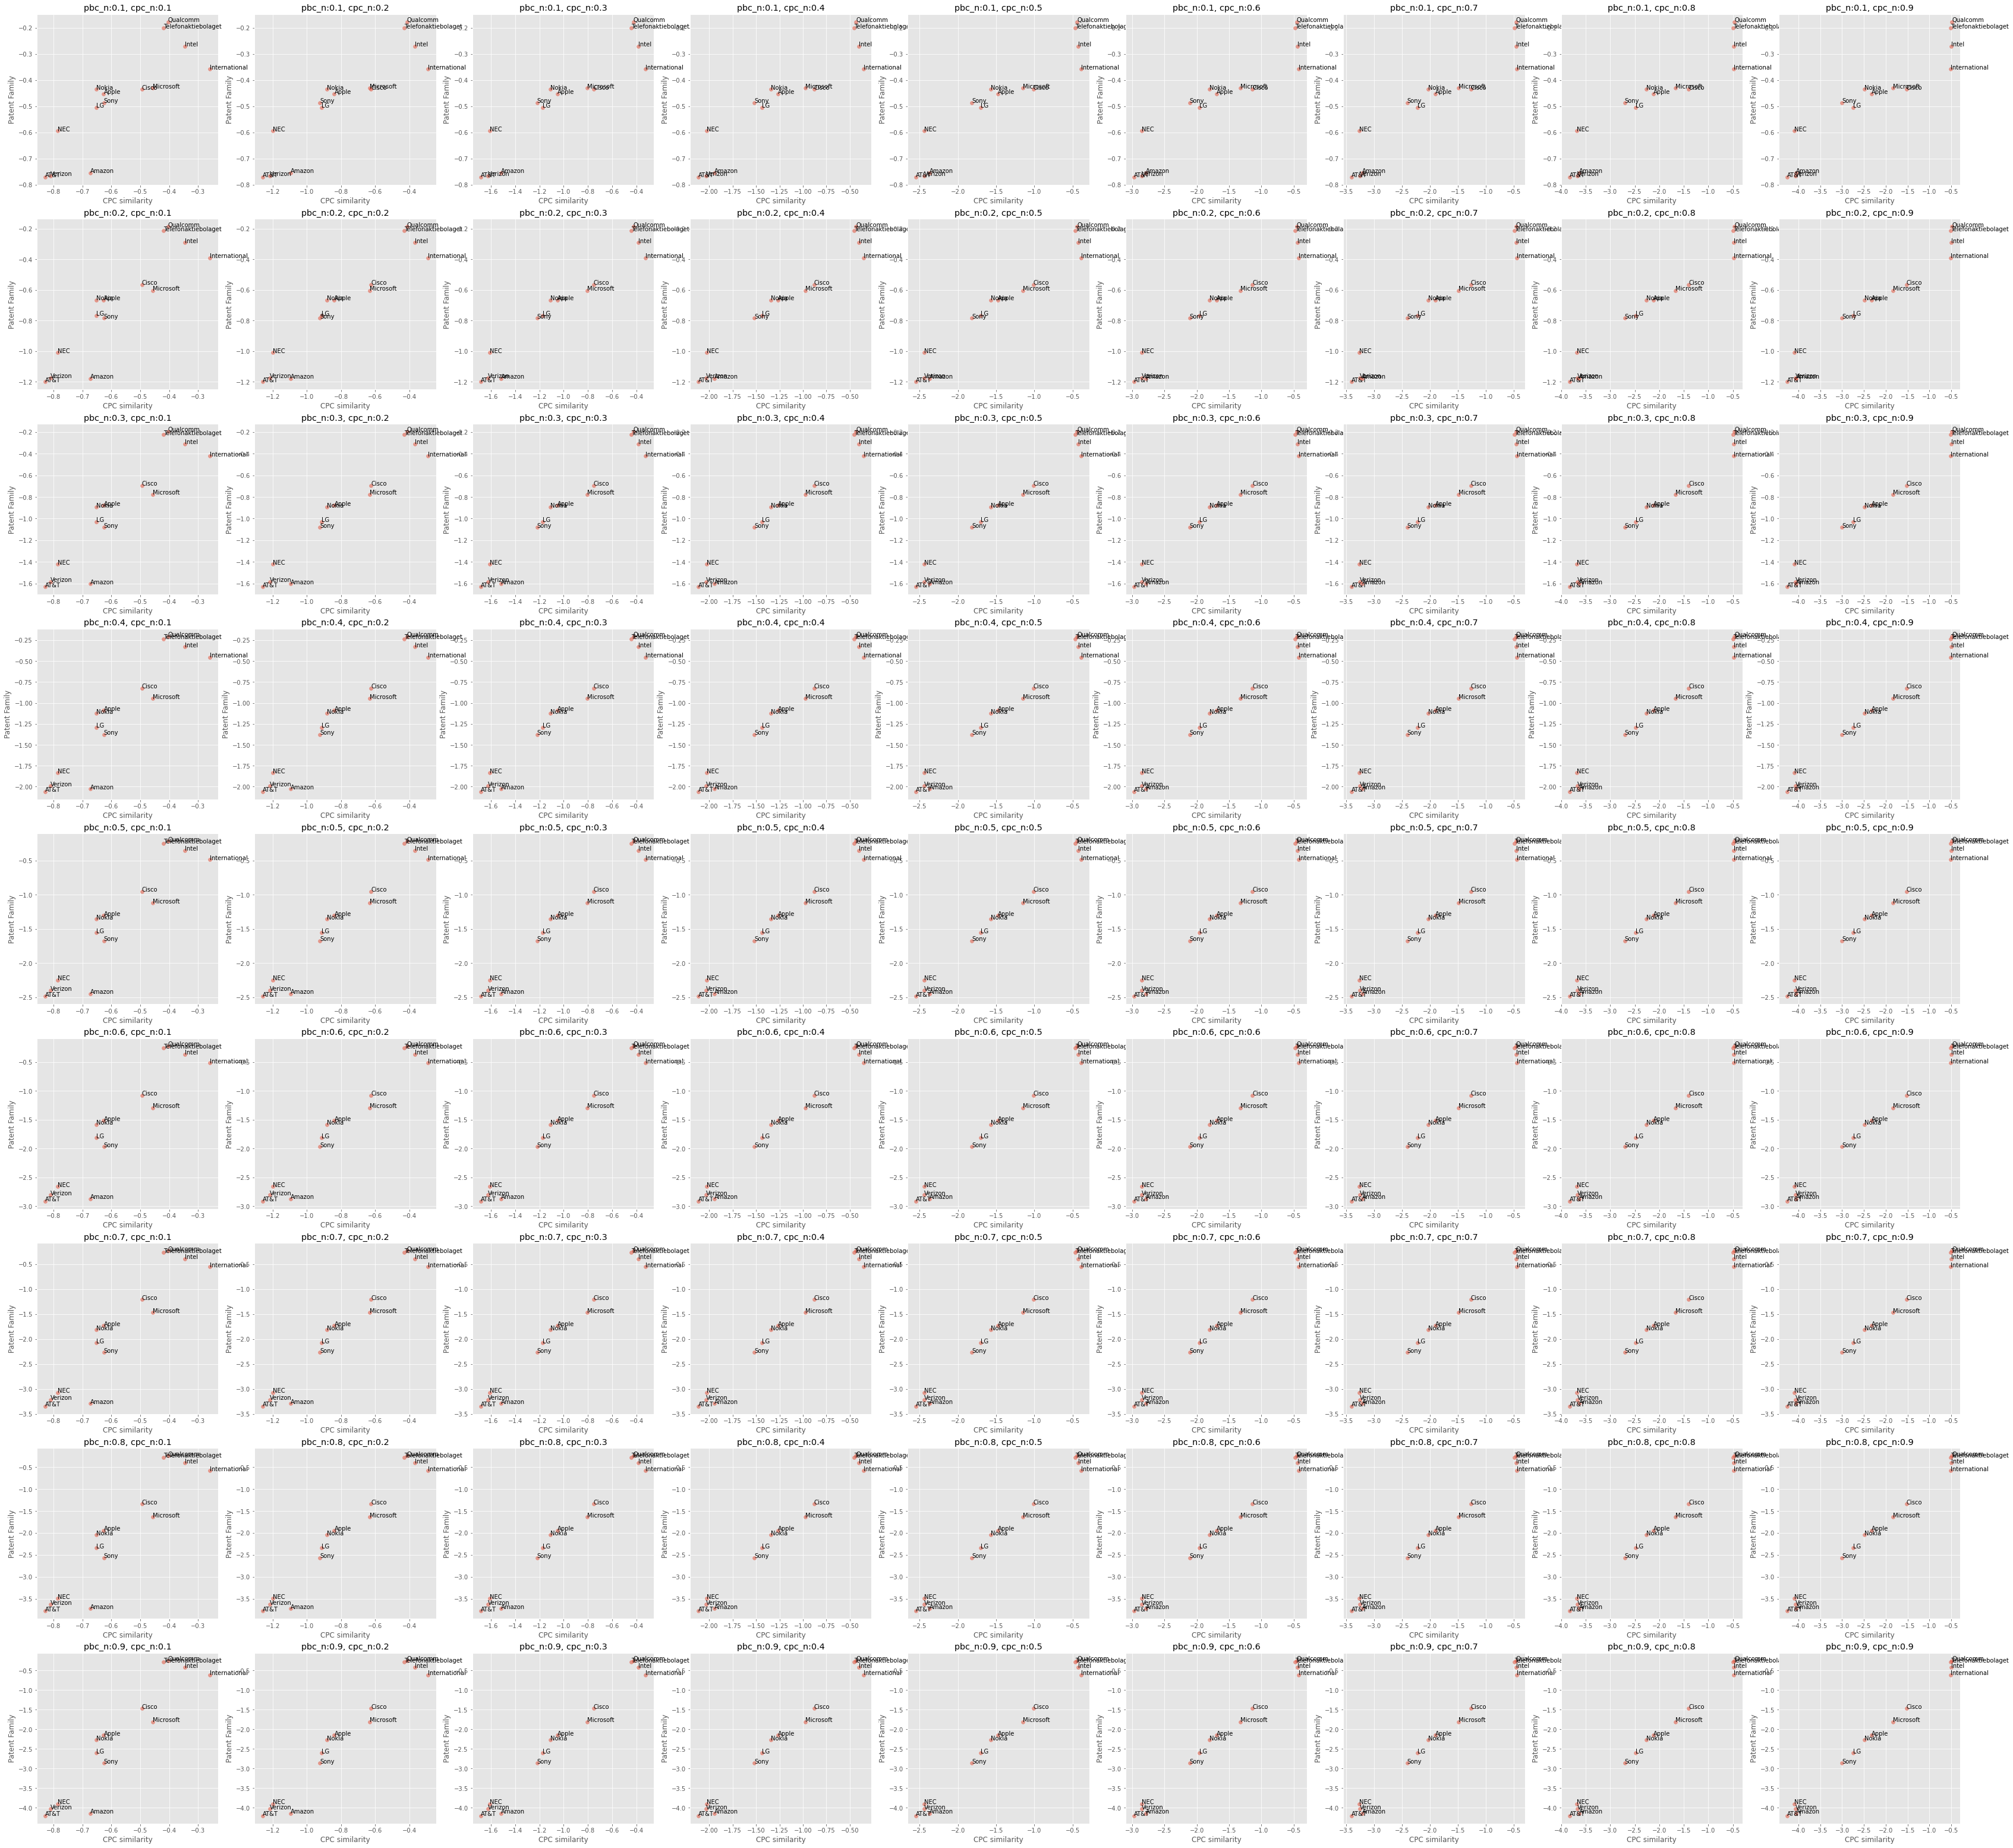

In [51]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2018_1.png'.format(pbc_n))

In [52]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.480077,0.253110
Telefonaktiebolaget LM Ericsson AB,0.509678,0.291085
Intel Corp,0.505182,0.429747
International Business Machines Corp,0.517521,0.616683
Cisco Technology Inc,1.528074,1.468889
Microsoft Technology Licensing LLC,1.841526,1.813965
Apple Inc,2.329993,2.156111
Nokia Technologies Oy,2.492844,2.277014
LG Electronics Inc,2.749524,2.602485


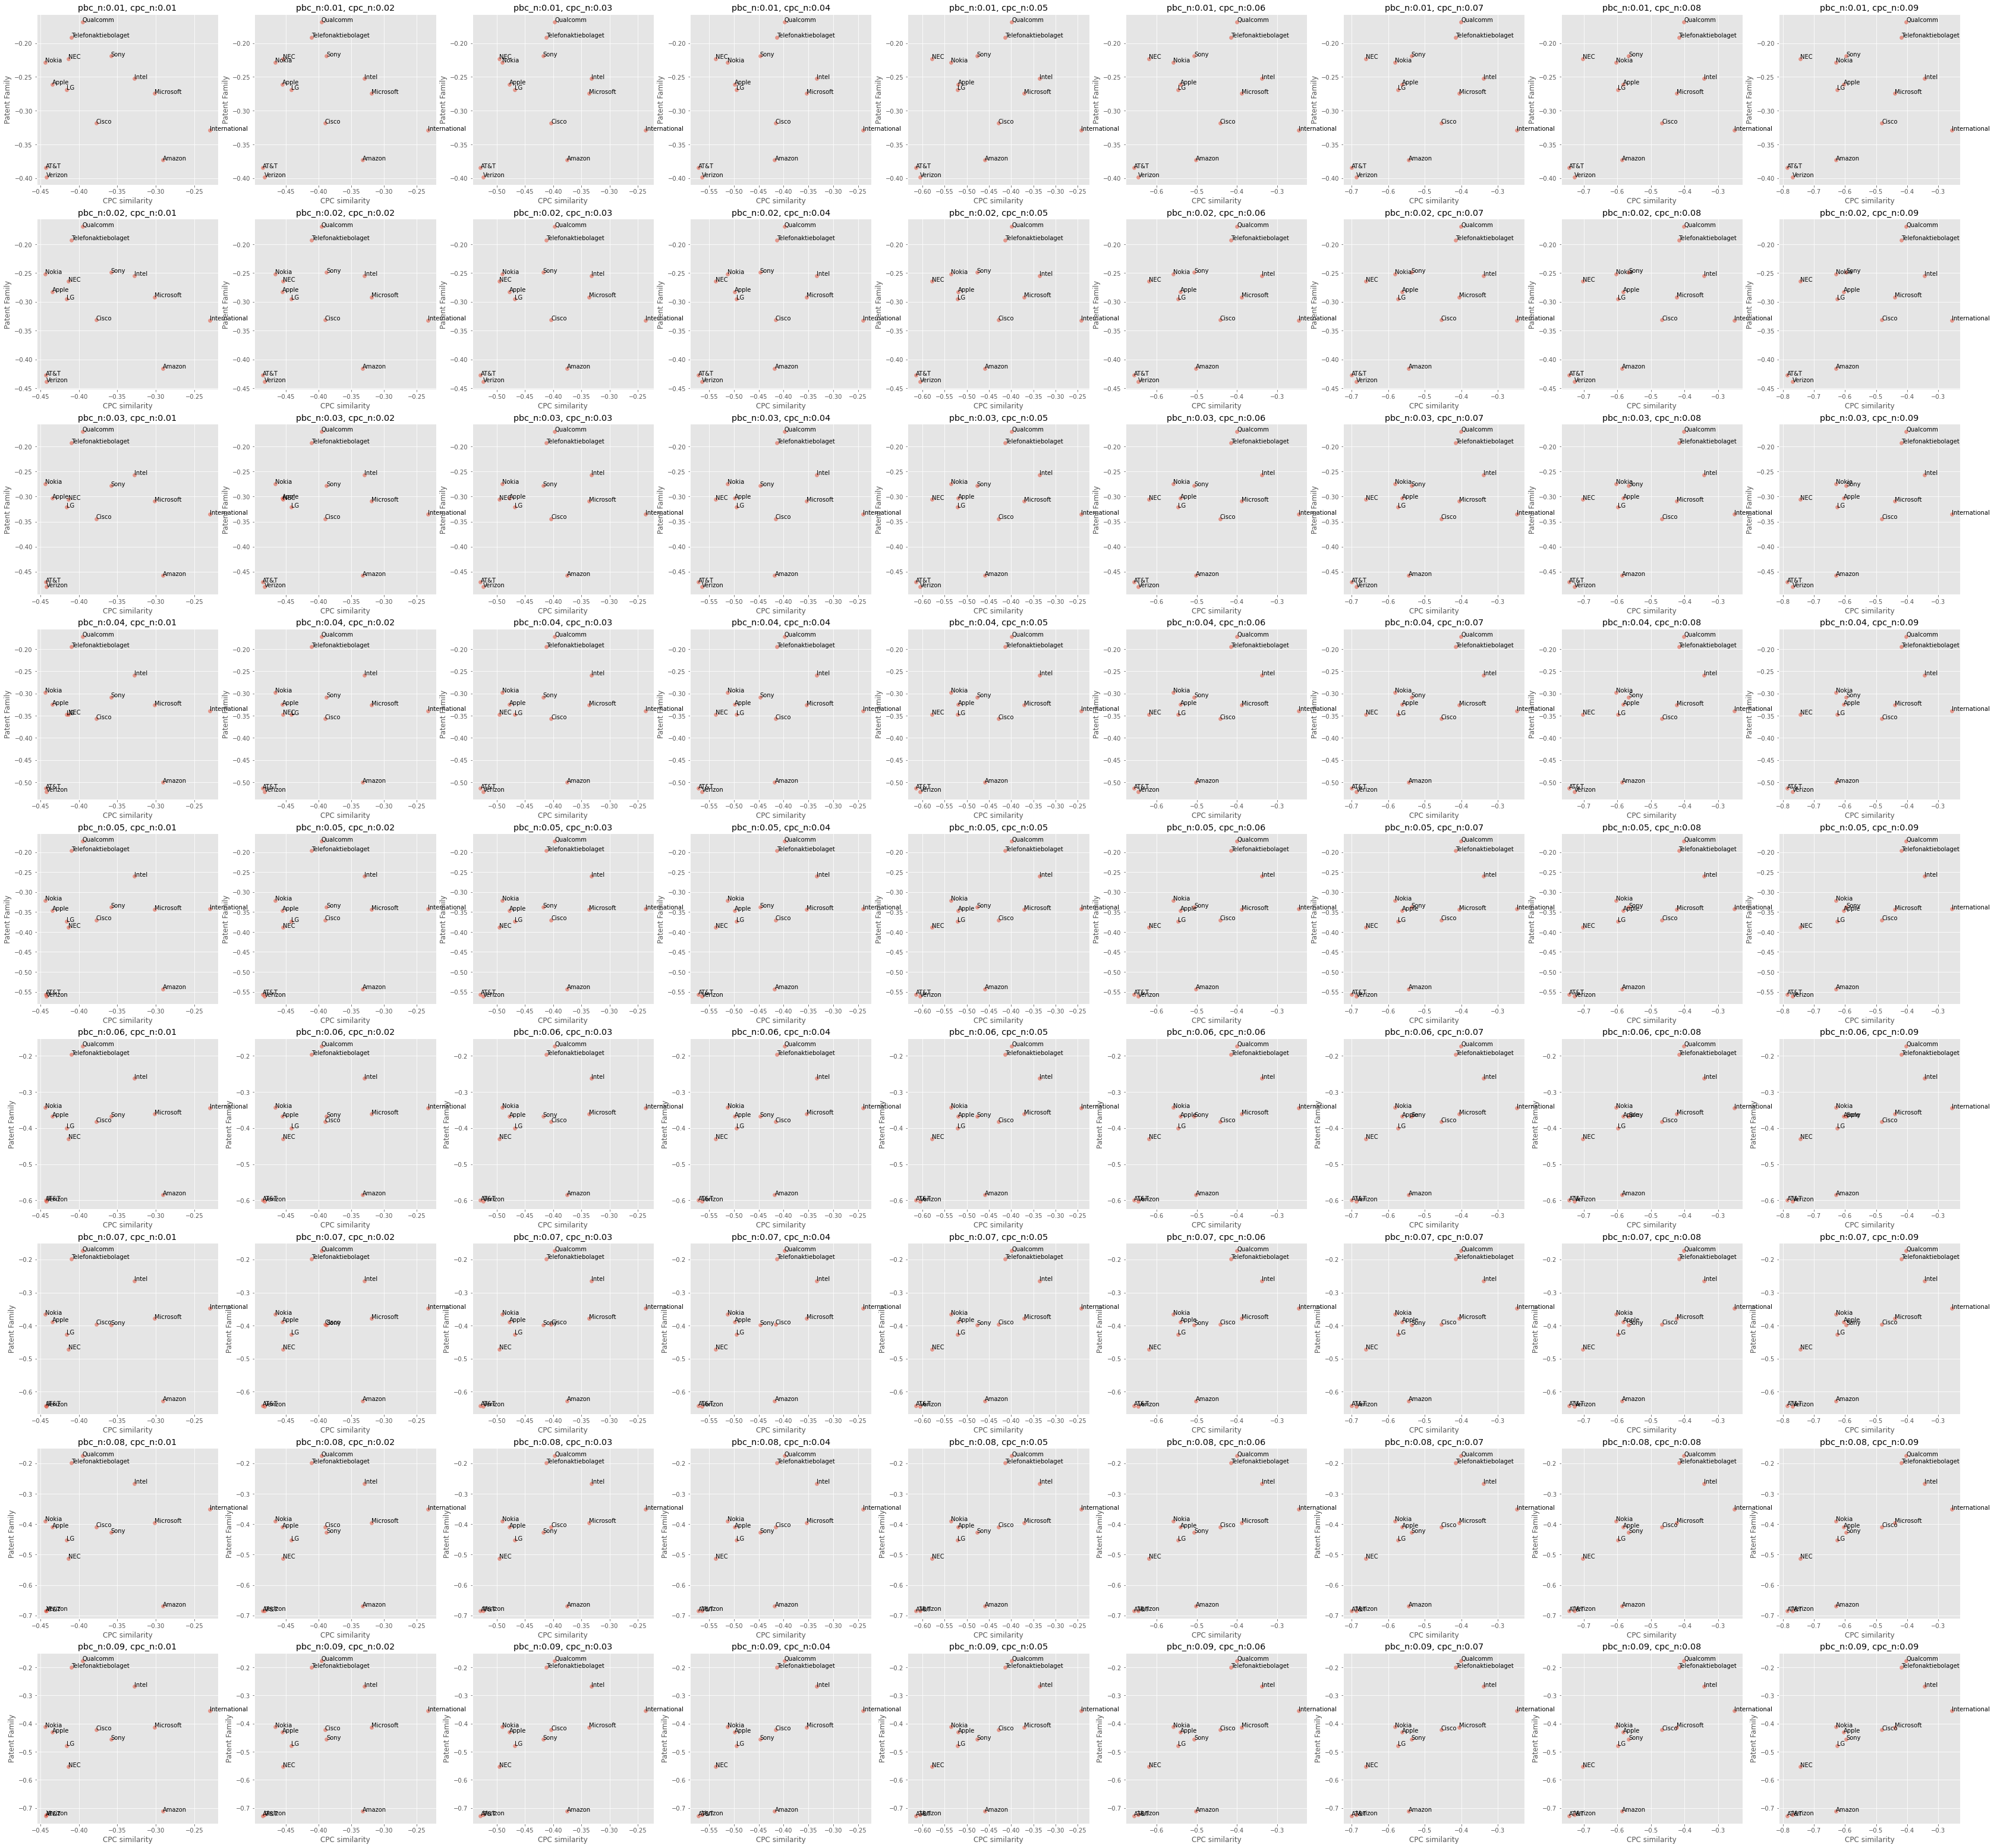

In [53]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2018_2.png'.format(pbc_n))

In [54]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.402870,0.175903
Telefonaktiebolaget LM Ericsson AB,0.418687,0.200094
Intel Corp,0.343779,0.268343
International Business Machines Corp,0.255590,0.354751
Cisco Technology Inc,0.480964,0.421779
Microsoft Technology Licensing LLC,0.440362,0.412801
Apple Inc,0.605123,0.431241
Nokia Technologies Oy,0.628168,0.412338
LG Electronics Inc,0.625580,0.478541


### Scatter Plot2

In [55]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_USA"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

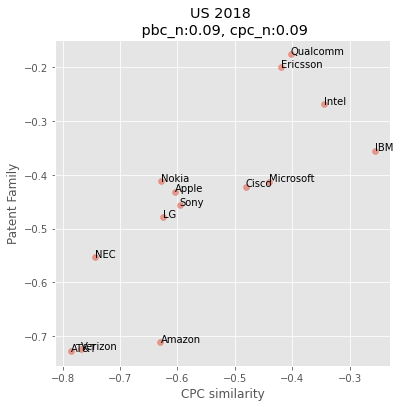

In [56]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("US 2018 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [57]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [58]:
competitor_ls

[1, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4]

In [59]:
c_df

,cpc,country
company,,
Qualcomm,0.402870,0.175903
Ericsson,0.418687,0.200094
Intel,0.343779,0.268343
IBM,0.255590,0.354751
Cisco Systems,0.480964,0.421779
Microsoft,0.440362,0.412801
Apple,0.605123,0.431241
Nokia,0.628168,0.412338
LG Electronics,0.625580,0.478541


In [60]:
c_df.to_csv("competitor_df/company/cpc_us_2018.csv")

## DE

In [61]:
ccontry = pd.read_csv("../rm_company_country_de_2018.csv")
ccpc = pd.read_csv("../rm_company_cpc_de_2018.csv")

In [62]:
ccontry[ccontry.company.isin(com_de_ls)]

,company,AR,AT,AU,BR,CA,CN,CZ,DE,EA,...,GB,IL,JP,KR,MA,RU,SE,SG,TW,US
3,Apple Inc,0.0,0.0,0.0,0.0,0.0,12.0,0.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
21,Deutsches Zentrum fuer Luft und Raumfahrt eV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Endress and Hauser SE and Co KG,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32,Fraunhofer Gesellschaft zur Forderung der Ange...,0.0,0.0,0.0,0.0,2.0,5.0,0.0,17.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0
33,Friedrich Alexander Univeritaet Erlangen Nuern...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,10.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
36,Giesecke and Devrient Mobile Security GmbH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Infineon Technologies AG,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
49,Intel Corp,0.0,0.0,0.0,0.0,0.0,20.0,0.0,39.0,0.0,...,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,24.0
50,Intel IP Corp,0.0,0.0,0.0,0.0,0.0,12.0,0.0,42.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,18.0
63,NEC Corp,0.0,0.0,1.0,0.0,0.0,4.0,0.0,4.0,0.0,...,1.0,0.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0


### Similarity計算

#### Country

- 換成機率  

In [63]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [64]:
ccontry_pbc = ccontry2.loc[com_de_ls,:].copy()
ccontry_pbc.head()

,AR,AT,AU,BR,CA,CN,CZ,DE,EA,EP,...,GB,IL,JP,KR,MA,RU,SE,SG,TW,US
company,,,,,,,,,,,,,,,,,,,,,
Intel Corp,0.0,0.0,0.000000,0.0,0.000000,0.208333,0.0,0.406250,0.0,0.041667,...,0.0,0.0,0.052083,0.041667,0.0,0.0,0.0,0.000000,0.000000,0.250000
Intel IP Corp,0.0,0.0,0.000000,0.0,0.000000,0.153846,0.0,0.538462,0.0,0.025641,...,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0,0.000000,0.000000,0.230769
Apple Inc,0.0,0.0,0.000000,0.0,0.000000,0.214286,0.0,0.517857,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.267857
Giesecke and Devrient Mobile Security GmbH,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.733333,0.0,0.266667,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
Samsung Electronics Co Ltd,0.0,0.0,0.018868,0.0,0.018868,0.207547,0.0,0.207547,0.0,0.018868,...,0.0,0.0,0.056604,0.188679,0.0,0.0,0.0,0.018868,0.056604,0.207547


In [65]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [66]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [67]:
ccpc_pbc = ccpc2.loc[com_de_ls,:].copy()
# ccpc_pbc

In [68]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [69]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

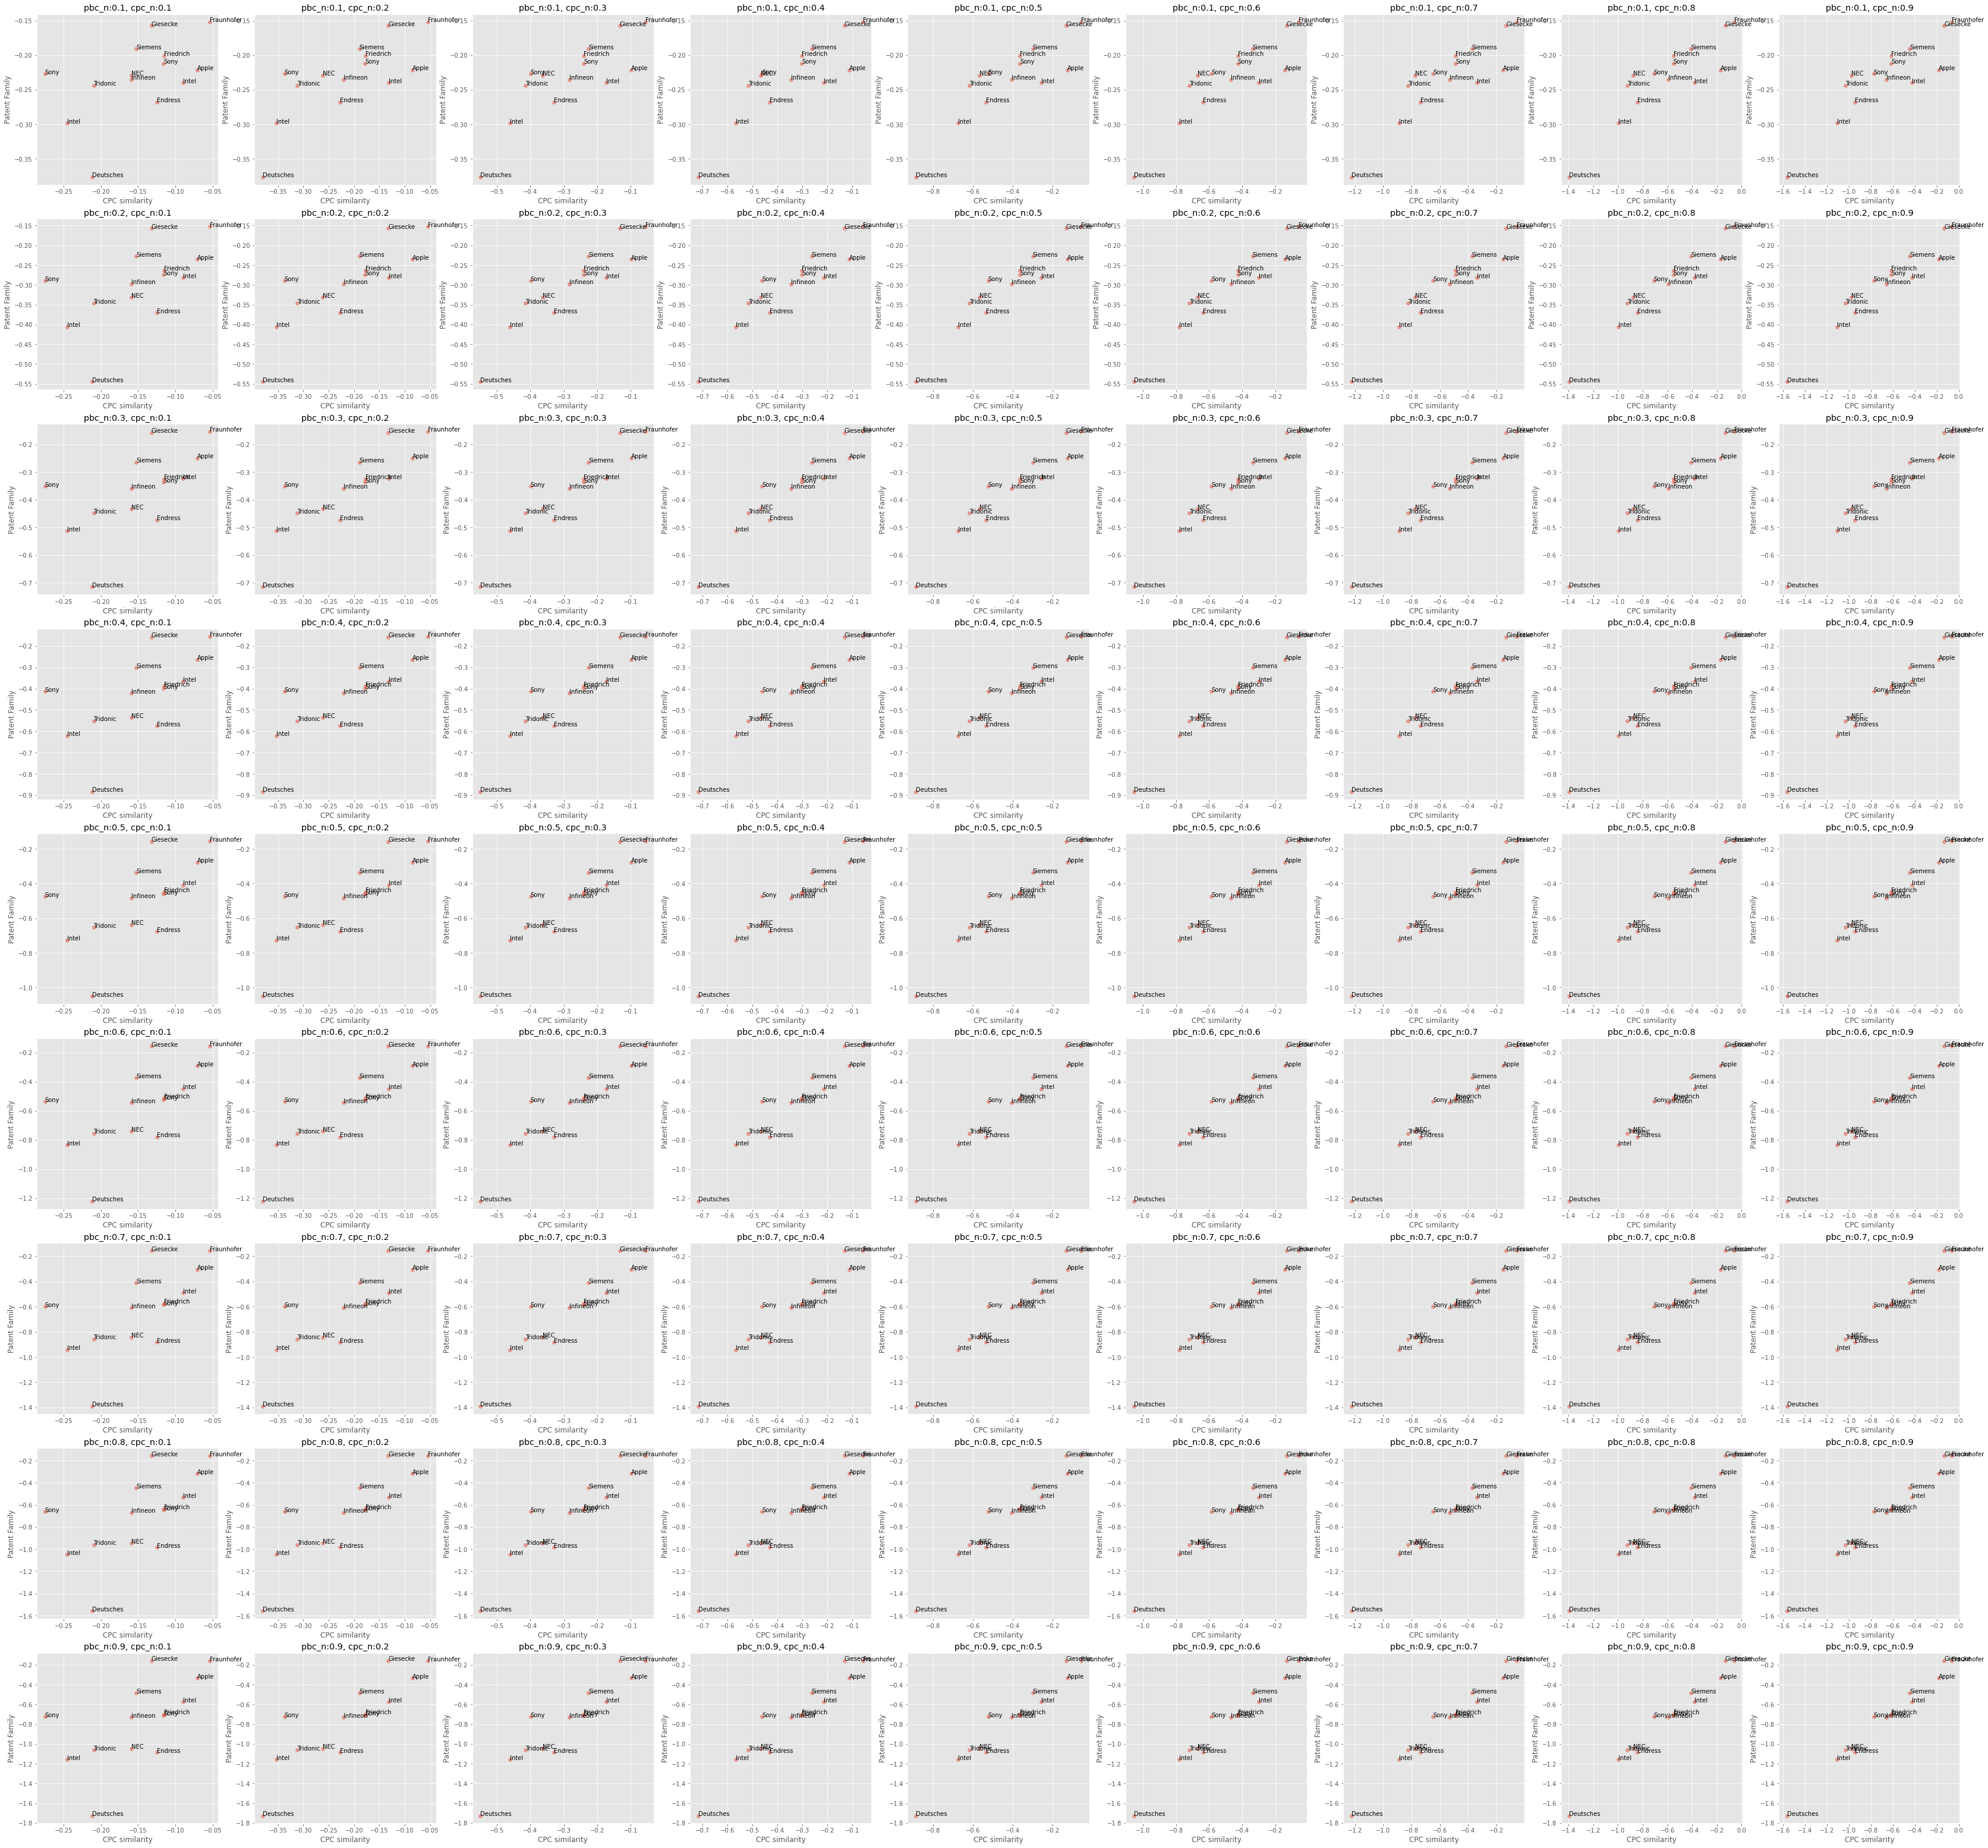

In [70]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2018_1.png'.format(pbc_n))

In [71]:
c_df

,cpc,country
company,,
Intel Corp,1.104209,1.157176
Intel IP Corp,0.423954,0.574669
Apple Inc,0.182623,0.333903
Giesecke and Devrient Mobile Security GmbH,0.132208,0.157233
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.060876,0.159119
Siemens AG,0.446482,0.485034
Friedrich Alexander Univeritaet Erlangen Nuernberg FAU,0.612974,0.698313
Sony Semiconductor Solutions Corp,0.772385,0.724388
Infineon Technologies AG,0.656424,0.732639


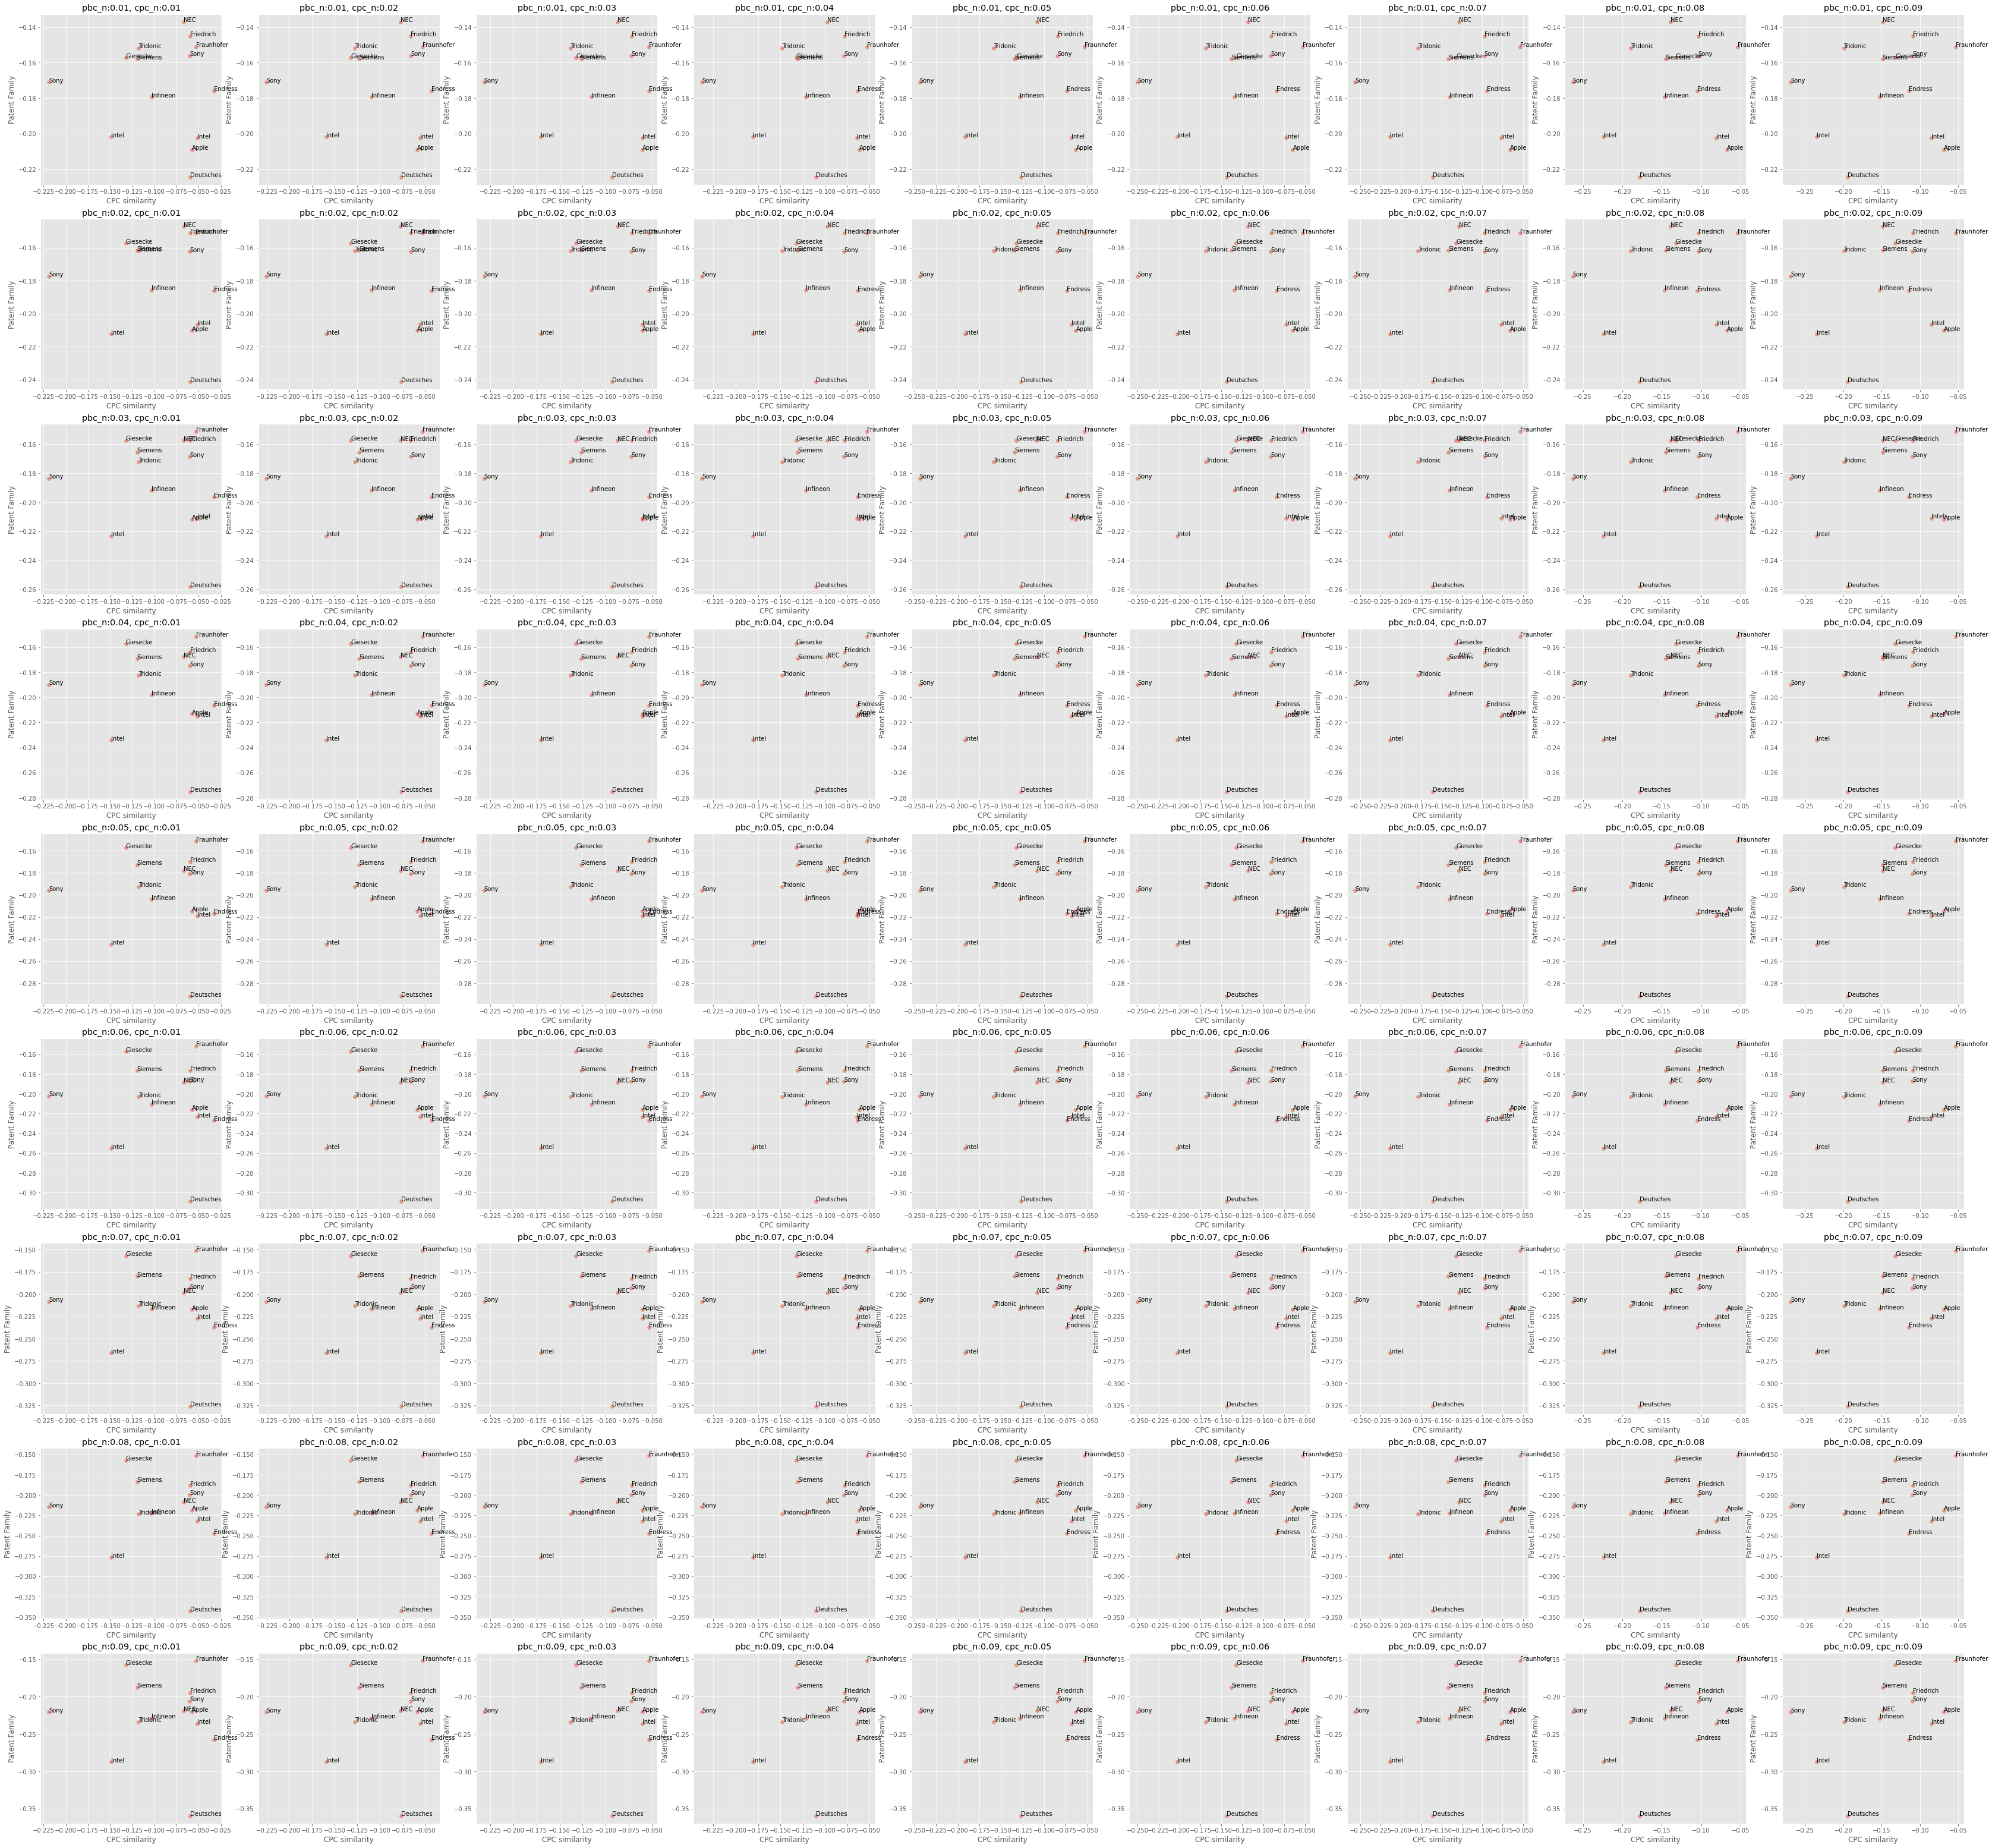

In [72]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2018_2.png'.format(pbc_n))

In [73]:
c_df

,cpc,country
company,,
Intel Corp,0.234685,0.287652
Intel IP Corp,0.085271,0.235987
Apple Inc,0.068903,0.220183
Giesecke and Devrient Mobile Security GmbH,0.132208,0.157233
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.053518,0.151761
Siemens AG,0.148888,0.187440
Friedrich Alexander Univeritaet Erlangen Nuernberg FAU,0.109426,0.194764
Sony Semiconductor Solutions Corp,0.268837,0.220839
Infineon Technologies AG,0.152875,0.229091


### Scatter Plot2

In [74]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_deA")\
                                                    .replace("Taiwan Semiconductor Manufacturing Co TSMC","TSMC")\
                                                    .replace("Suzhou Jiang Zuomen Network Technology","Suzhou_JZ")\
                                                    .replace("Suzhou Jiang Zuomen Network Tech","Suzhou_JZ_net")\
                                                    .replace("Sony Group","Sony_Group")\
                                                    .replace("Sony Semiconductor Solutions","Sony_Semiconductor")\
                                                    .replace("Siemens Energy Global GmbH and Co KG","Siemens_Energy")\
                                                    .replace("Siemens Mobility GmbH","Siemens_Mobility")\
                                                    .replace("Bayerische Motoren Werke AG","BMW")\
                                                    .replace("Friedrich Alexander Univeritaet Erlangen Nuernberg FAU","FAU")\
                                                    .replace("Intel IP","Intel_IP"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

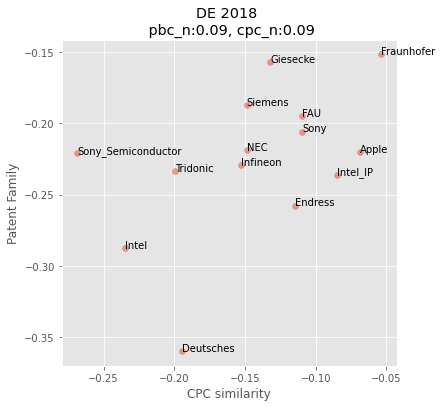

In [75]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("DE 2018 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [76]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [77]:
competitor_ls

[4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 4]

In [78]:
c_df

,cpc,country
company,,
Intel,0.234685,0.287652
Intel_IP,0.085271,0.235987
Apple,0.068903,0.220183
Giesecke and Devrient Mobile Security GmbH,0.132208,0.157233
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.053518,0.151761
Siemens AG,0.148888,0.187440
FAU,0.109426,0.194764
Sony_Semiconductor,0.268837,0.220839
Infineon Technologies AG,0.152875,0.229091


In [79]:
c_df.to_csv("competitor_df/company/cpc_de_2018.csv")